# DSC 550 Michael Ersevim - Week 2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

This dataset is from Kaggle

The description for the heuristic is given below from the website:

With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.

In [4]:
df = pd.read_csv('Sample - Superstore.csv', encoding='unicode_escape') #read in files and correct for encoding issues...
df.head() # defaults to 5 rows, unless specified in '()'

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [42]:
df['Profit %'] = df['Profit']/df['Sales'] # define % of profit on sales to see if there's a relation b/t profit and discount

<AxesSubplot:xlabel='Discount', ylabel='Profit %'>

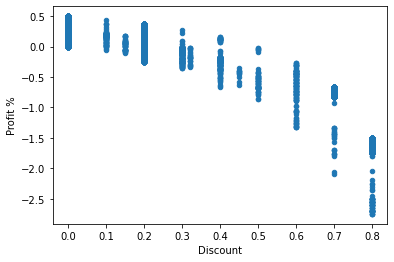

In [43]:
df.plot.scatter(x ='Discount', y='Profit %') # graph the percentage of profit across discount amounts

As we can see above, there is an inverse relationship between the amount of discount given and the amount of profit earned.
This is intuitive, but helps frame the question of how to maximize profits with the proper amount of discount, i.e., finding the 'sweet spot'.

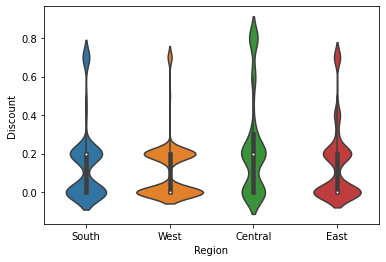

In [44]:
ax = sns.violinplot(x="Region", y="Discount", data=df) # Let's see how discount amounts vary by Region

The visulaization above shows relative amounts in counts by width of the graphs. We see that for the West region, a little more than half of their items are NOT discounted, and the rest is 20% off, with a small exception of ~75% off a few items.
In contrast, the Central region has more than half of their items for sale at a 20% discount, and a not insignificant group at 80% off(!)

In [60]:
dfbar = df #creates a new dataframe to create aggregated amounts

In [61]:
dfbar = df[['Sales','Profit','Sub-Category']].groupby(['Sub-Category']).sum(['Sales','Profit'])
dfbar   # The line above defines which columns to be used for aggregation. 
        # Below, we see the sum of dollars for sales and profit, grouped by each sub-category of items sold.

,Sales,Profit
Sub-Category,,
Accessories,167380.3180,41936.6357
Appliances,107532.1610,18138.0054
Art,27118.7920,6527.7870
Binders,203412.7330,30221.7633
Bookcases,114879.9963,-3472.5560
Chairs,328449.1030,26590.1663
Copiers,149528.0300,55617.8249
Envelopes,16476.4020,6964.1767
Fasteners,3024.2800,949.5182


In [62]:
dfbar['Profit%'] = dfbar['Profit']/dfbar['Sales'] # Here, I define a new column: the profit percentage

In [70]:
dfbar.sort_values(by = 'Profit%', axis=0, ascending=False).head(10) # now sorting by descending percentage profit amounts,
    # we see that Labels, Paper, Envelopes and Copiers have the highest profit margins, all above 30%.

,Sales,Profit,Profit%
Sub-Category,,,
Labels,12486.312,5546.2540,0.444187
Paper,78479.206,34053.5693,0.433918
Envelopes,16476.402,6964.1767,0.422676
Copiers,149528.030,55617.8249,0.371956
Fasteners,3024.280,949.5182,0.313965
Accessories,167380.318,41936.6357,0.250547
Art,27118.792,6527.7870,0.240711
Appliances,107532.161,18138.0054,0.168675
Binders,203412.733,30221.7633,0.148574


In [12]:
dfg = df.groupby('Sub-Category').Profit.agg(['sum']) # Let's look at total dollars of profit by sub-category alone
dfgs = dfg.sort_values(by = 'sum', axis=0, ascending=False) # and show it in descending order...
dfgs # display it

,sum
Sub-Category,
Copiers,55617.8249
Phones,44515.7306
Accessories,41936.6357
Paper,34053.5693
Binders,30221.7633
Chairs,26590.1663
Storage,21278.8264
Appliances,18138.0054
Furnishings,13059.1436


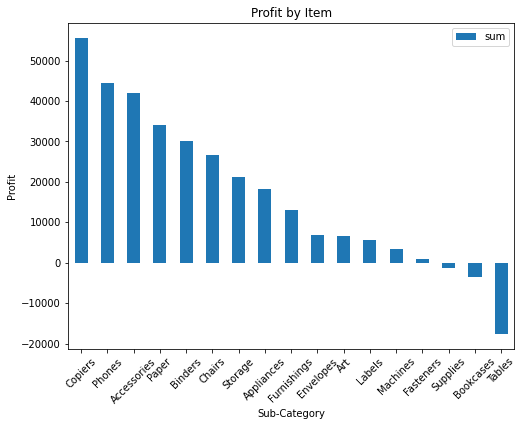

In [13]:
ax = dfgs.plot(kind='bar', figsize=(8, 6), title='Profit by Item', xlabel='Sub-Category', ylabel='Profit', rot=45)
plt.show() # This plots the above sorted table by descending amounts of profit $$

This fairly quick and simple analysis of this Superstore's sales and profits can yield big insights as to how to
increase profits. SImply put:
1) Sell MORE Copiers, Phones and Accessories
2) See FEWER Bookcases and Tables
3) You can afford to discount paper, labels and envelopes MORE to get customers into the store to be sold on Copiers and Phones.